# Análisis Exploratorio de Datos (EDA) - Pipeline Genérico

Este notebook proporciona un análisis exploratorio completo y automático para cualquier dataset.

**Funcionalidades:**
- Carga automática de datos desde CSV
- Detección automática de tipos de datos
- Análisis estadístico descriptivo
- Detección de valores faltantes y outliers
- Visualizaciones automáticas por tipo de variable
- Correlación entre variables numéricas
- Distribución de variables categóricas
- Resumen ejecutivo del dataset

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilos visuales
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Librerías importadas correctamente")

✓ Librerías importadas correctamente


## 1. Cargar el Dataset

Carga de datos desde CSV. Por defecto busca `Base_de_datos.csv` en la raíz del proyecto.

In [4]:
import os
import json

# Cargar configuración
config_path = "../../config.json"  # Ruta relativa al notebook
data_path = None

if os.path.exists(config_path):
    with open(config_path, 'r') as f:
        config = json.load(f)
        data_path = config.get('data_path', 'Base_de_datos.csv')
else:
    data_path = "../../Base_de_datos.csv"  # Fallback a ruta por defecto

# Cargar dataset
df = pd.read_csv(data_path)

print(f"✓ Dataset cargado desde: {data_path}")
print(f"  Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\n  Primeras filas del dataset:")
df.head()

✓ Dataset cargado desde: ../../alzheimers_disease_data.csv
  Dimensiones: 2149 filas × 35 columnas

  Primeras filas del dataset:


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## 2. Información General del Dataset

Inspección de tipos de datos, memoria utilizada y estructura general.

In [5]:
# Crear resumen de información
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB\n")

print("TIPOS DE DATOS:")
print("-" * 80)
dtype_info = pd.DataFrame({
    'Columna': df.columns,
    'Tipo': df.dtypes,
    'No Nulos': df.count(),
    'Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2)
})
print(dtype_info.to_string(index=False))
print("\n" + "="*80)

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 2149 filas × 35 columnas
Memoria utilizada: 0.69 MB

TIPOS DE DATOS:
--------------------------------------------------------------------------------
                  Columna    Tipo  No Nulos  Nulos  % Nulos
                PatientID   int64      2149      0      0.0
                      Age   int64      2149      0      0.0
                   Gender   int64      2149      0      0.0
                Ethnicity   int64      2149      0      0.0
           EducationLevel   int64      2149      0      0.0
                      BMI float64      2149      0      0.0
                  Smoking   int64      2149      0      0.0
       AlcoholConsumption float64      2149      0      0.0
         PhysicalActivity float64      2149      0      0.0
              DietQuality float64      2149      0      0.0
             SleepQuality float64      2149      0      0.0
  FamilyHistoryAlzheimers   int64      2149      0      0.0
    CardiovascularDiseas

## 3. Estadísticas Descriptivas

Análisis estadístico automático según el tipo de variable.

In [9]:
# Estadísticas para variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n" + "="*80)
print("ESTADÍSTICAS NUMÉRICAS")
print("="*80 + "\n")

if numeric_cols:
    stats = df[numeric_cols].describe().T
    stats['Rango'] = df[numeric_cols].max() - df[numeric_cols].min()
    stats['Asimetría'] = df[numeric_cols].skew()
    stats['Curtosis'] = df[numeric_cols].kurtosis()
    print(stats.round(3))
else:
    print("No hay variables numéricas en el dataset.")

print("\n" + "="*80)
print("ESTADÍSTICAS CATEGÓRICAS")
print("="*80 + "\n")

if categorical_cols:
    for col in categorical_cols:
        print(f"📊 {col}")
        print(f"   Valores únicos: {df[col].nunique()}")
        print(f"   Más frecuente: {df[col].value_counts().index[0]} ({df[col].value_counts().values[0]} veces)")
        print(f"   Distribución:\n{df[col].value_counts()}\n")
else:
    print("No hay variables categóricas en el dataset.")


ESTADÍSTICAS NUMÉRICAS

                            count      mean      std       min       25%  \
PatientID                  2149.0  5825.000  620.507  4751.000  5288.000   
Age                        2149.0    74.909    8.990    60.000    67.000   
Gender                     2149.0     0.506    0.500     0.000     0.000   
Ethnicity                  2149.0     0.698    0.996     0.000     0.000   
EducationLevel             2149.0     1.287    0.905     0.000     1.000   
BMI                        2149.0    27.656    7.217    15.009    21.611   
Smoking                    2149.0     0.289    0.453     0.000     0.000   
AlcoholConsumption         2149.0    10.039    5.758     0.002     5.140   
PhysicalActivity           2149.0     4.920    2.857     0.004     2.571   
DietQuality                2149.0     4.993    2.909     0.009     2.458   
SleepQuality               2149.0     7.051    1.764     4.003     5.483   
FamilyHistoryAlzheimers    2149.0     0.252    0.434     0.000 

## 4. Análisis de Valores Faltantes

Detección y visualización de datos faltantes.

In [10]:
# Análisis de valores faltantes
print("\n" + "="*80)
print("ANÁLISIS DE VALORES FALTANTES")
print("="*80 + "\n")

missing_data = pd.DataFrame({
    'Columna': df.columns,
    'Nulos': df.isnull().sum(),
    '% Nulos': (df.isnull().sum() / len(df) * 100).round(2),
    'Tipo': df.dtypes
})

missing_data = missing_data[missing_data['Nulos'] > 0].sort_values('% Nulos', ascending=False)

if len(missing_data) > 0:
    print("Columnas con valores faltantes:")
    print(missing_data.to_string(index=False))
    
    # Visualizar patrones de valores faltantes
    if len(missing_data) <= 10:
        fig, ax = plt.subplots(figsize=(10, 4))
        missing_data_sorted = missing_data.sort_values('% Nulos', ascending=True)
        ax.barh(missing_data_sorted['Columna'], missing_data_sorted['% Nulos'], color='coral')
        ax.set_xlabel('% de Valores Faltantes')
        ax.set_title('Distribución de Valores Faltantes')
        ax.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
else:
    print("✓ No hay valores faltantes en el dataset")


ANÁLISIS DE VALORES FALTANTES

✓ No hay valores faltantes en el dataset


## 5. Visualización de Distribuciones de Variables Numéricas

Histogramas y gráficos de densidad para cada variable numérica.


📈 Visualizando 34 variable(s) numérica(s)...



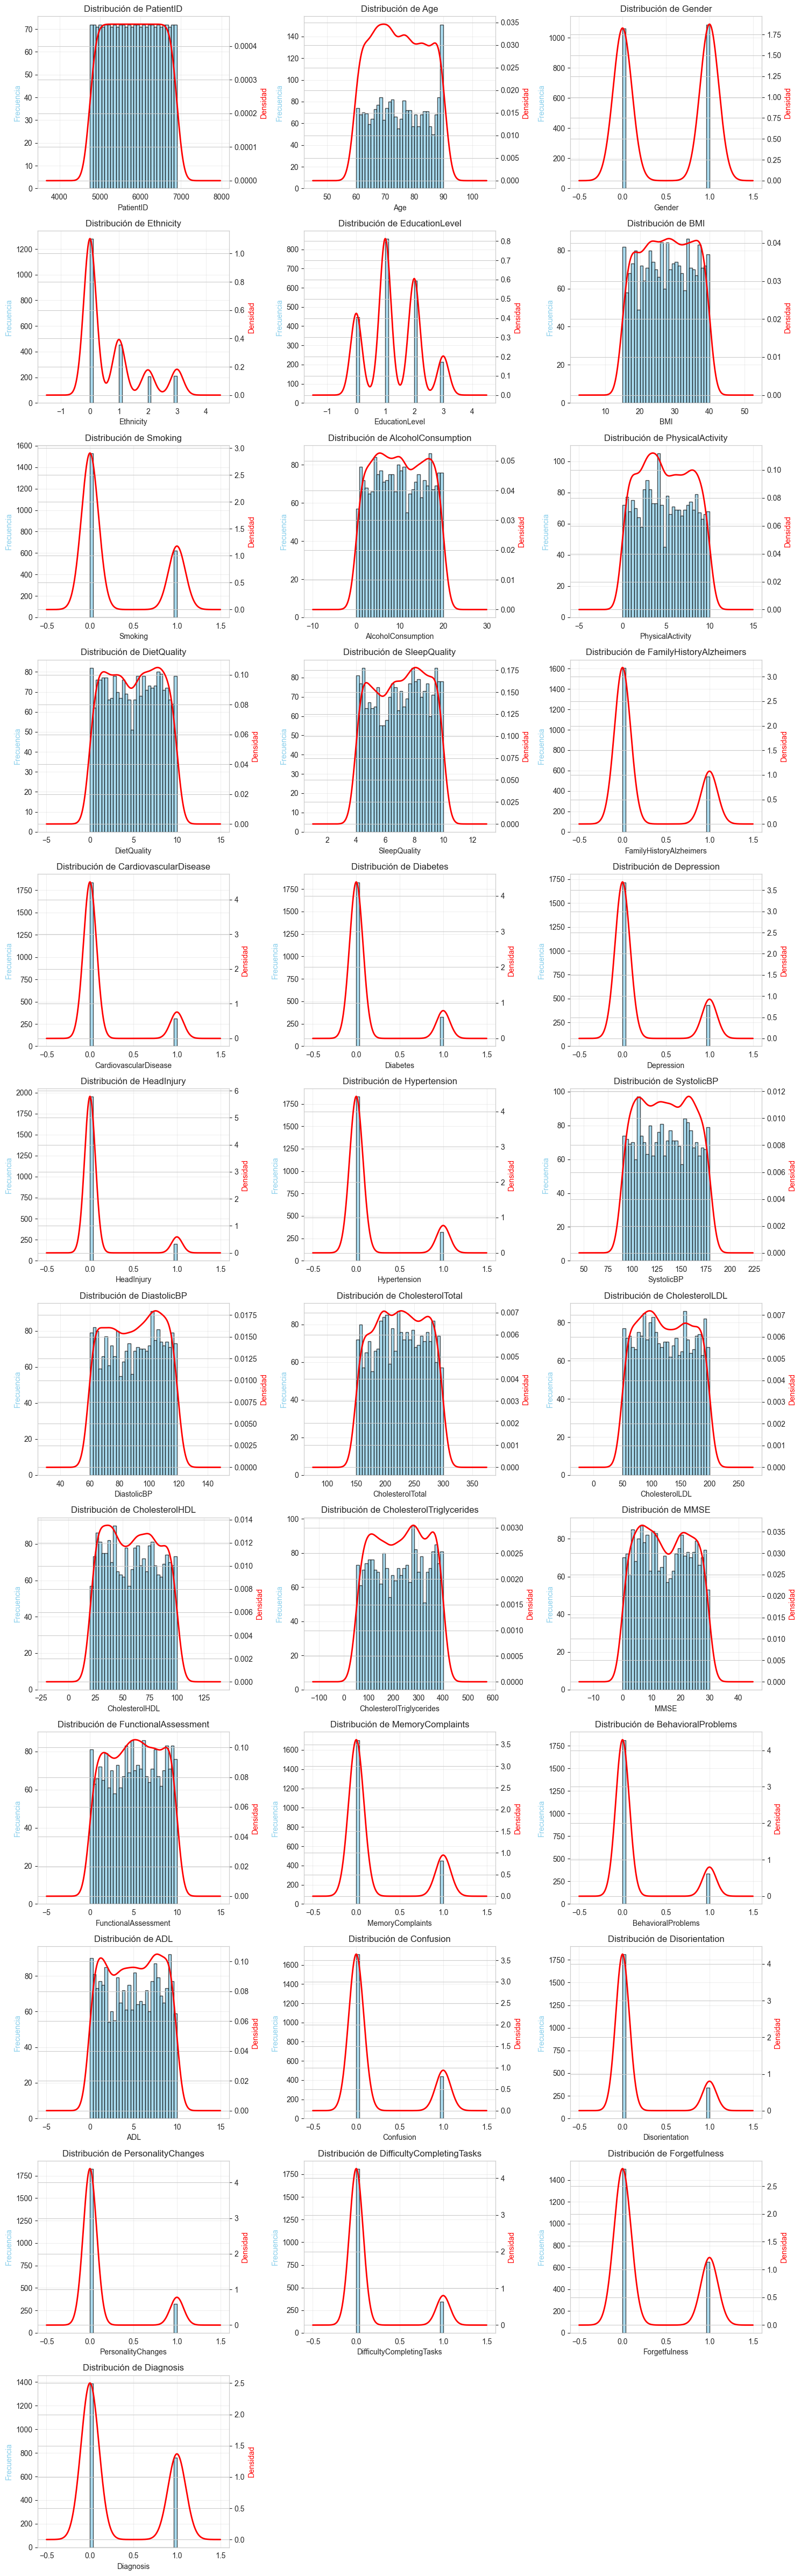

In [11]:
if numeric_cols:
    print(f"\n📈 Visualizando {len(numeric_cols)} variable(s) numérica(s)...\n")
    
    # Calcular número de filas y columnas para subplot
    n_cols = min(3, len(numeric_cols))
    n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if len(numeric_cols) > 1 else [axes]
    
    for idx, col in enumerate(numeric_cols):
        ax = axes[idx]
        
        # Histograma con distribución normal
        ax.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black', color='skyblue')
        ax2 = ax.twinx()
        df[col].dropna().plot(kind='density', ax=ax2, color='red', linewidth=2)
        
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia', color='skyblue')
        ax2.set_ylabel('Densidad', color='red')
        ax.set_title(f'Distribución de {col}')
        ax.grid(alpha=0.3)
    
    # Eliminar subplots vacíos
    for idx in range(len(numeric_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay variables numéricas para visualizar.")

## 6. Análisis de Outliers

Detección de outliers usando el método del Rango Intercuartílico (IQR).

In [ ]:
# Detección de outliers usando IQR
print("\n" + "="*80)
print("ANÁLISIS DE OUTLIERS (Método IQR)")
print("="*80 + "\n")

outlier_summary = []

if numeric_cols:
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        n_outliers = len(outliers)
        
        if n_outliers > 0:
            pct_outliers = round((n_outliers / len(df) * 100), 2)
            outlier_summary.append({
                'Columna': col,
                'Outliers': n_outliers,
                '% Outliers': pct_outliers,
                'Rango Válido': f"[{lower_bound:.2f}, {upper_bound:.2f}]"
            })
            print(f"⚠️  {col}: {n_outliers} outliers ({pct_outliers}%)")
    
    if outlier_summary:
        outlier_df = pd.DataFrame(outlier_summary)
        print("\n" + outlier_df.to_string(index=False))
        
        # Boxplot de variables con outliers - Disposición vertical
        if len(outlier_summary) > 0:
            n_plots = len(outlier_summary)
            n_cols = 2  # 2 columnas
            n_rows = (n_plots + n_cols - 1) // n_cols  # Calcula filas necesarias
            
            fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
            axes = axes.flatten()  # Convierte a array 1D para indexar fácilmente
            
            for idx, item in enumerate(outlier_summary):
                col = item['Columna']
                axes[idx].boxplot(df[col].dropna(), vert=True)
                axes[idx].set_ylabel(col)
                axes[idx].set_title(f'Boxplot de {col}')
                axes[idx].grid(alpha=0.3, axis='y')
            
            # Eliminar subplots vacíos si los hay
            for idx in range(len(outlier_summary), len(axes)):
                fig.delaxes(axes[idx])
            
            plt.tight_layout()
            plt.show()
    else:
        print("\n✓ No se detectaron outliers significativos en el dataset")
else:
    print("No hay variables numéricas para analizar outliers.")

## 7. Análisis de Variables Categóricas

Gráficos de barras para variables categóricas.


📊 Visualizando 1 variable(s) categórica(s)...



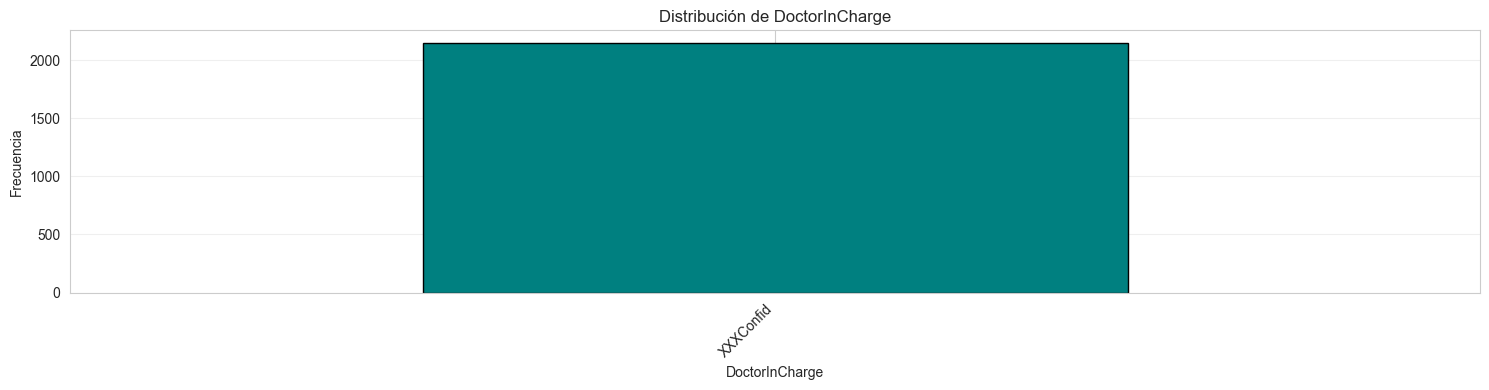

In [15]:
if categorical_cols:
    print(f"\n📊 Visualizando {len(categorical_cols)} variable(s) categórica(s)...\n")
    
    # Calcular número de filas y columnas para subplot
    n_cols = min(3, len(categorical_cols))
    n_rows = (len(categorical_cols) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if len(categorical_cols) > 1 else [axes]
    
    for idx, col in enumerate(categorical_cols):
        ax = axes[idx]
        
        # Contar valores y crear gráfico
        value_counts = df[col].value_counts()
        
        # Limitar a 10 categorías para mejor visualización
        if len(value_counts) > 10:
            value_counts = value_counts.head(10)
            title = f'Top 10 - {col} (hay más categorías)'
        else:
            title = f'Distribución de {col}'
        
        value_counts.plot(kind='bar', ax=ax, color='teal', edgecolor='black')
        ax.set_title(title)
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')
        ax.grid(axis='y', alpha=0.3)
        plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Eliminar subplots vacíos
    for idx in range(len(categorical_cols), len(axes)):
        fig.delaxes(axes[idx])
    
    plt.tight_layout()
    plt.show()
else:
    print("No hay variables categóricas para visualizar.")

## 8. Análisis de Correlación

Correlación entre variables numéricas y heatmap de correlación.


MATRIZ DE CORRELACIÓN

                           PatientID    Age  Gender  Ethnicity  \
PatientID                      1.000  0.003  -0.044     -0.008   
Age                            0.003  1.000   0.029      0.028   
Gender                        -0.044  0.029   1.000     -0.004   
Ethnicity                     -0.008  0.028  -0.004      1.000   
EducationLevel                -0.002 -0.061  -0.007      0.027   
BMI                           -0.034 -0.016   0.006     -0.003   
Smoking                        0.022  0.020   0.017      0.031   
AlcoholConsumption            -0.021  0.007   0.004      0.008   
PhysicalActivity              -0.011 -0.010  -0.036      0.020   
DietQuality                   -0.018 -0.023   0.011     -0.018   
SleepQuality                  -0.026  0.049   0.007      0.029   
FamilyHistoryAlzheimers        0.002 -0.019   0.018      0.023   
CardiovascularDisease          0.018 -0.015   0.035      0.002   
Diabetes                      -0.004 -0.006  -0.018 

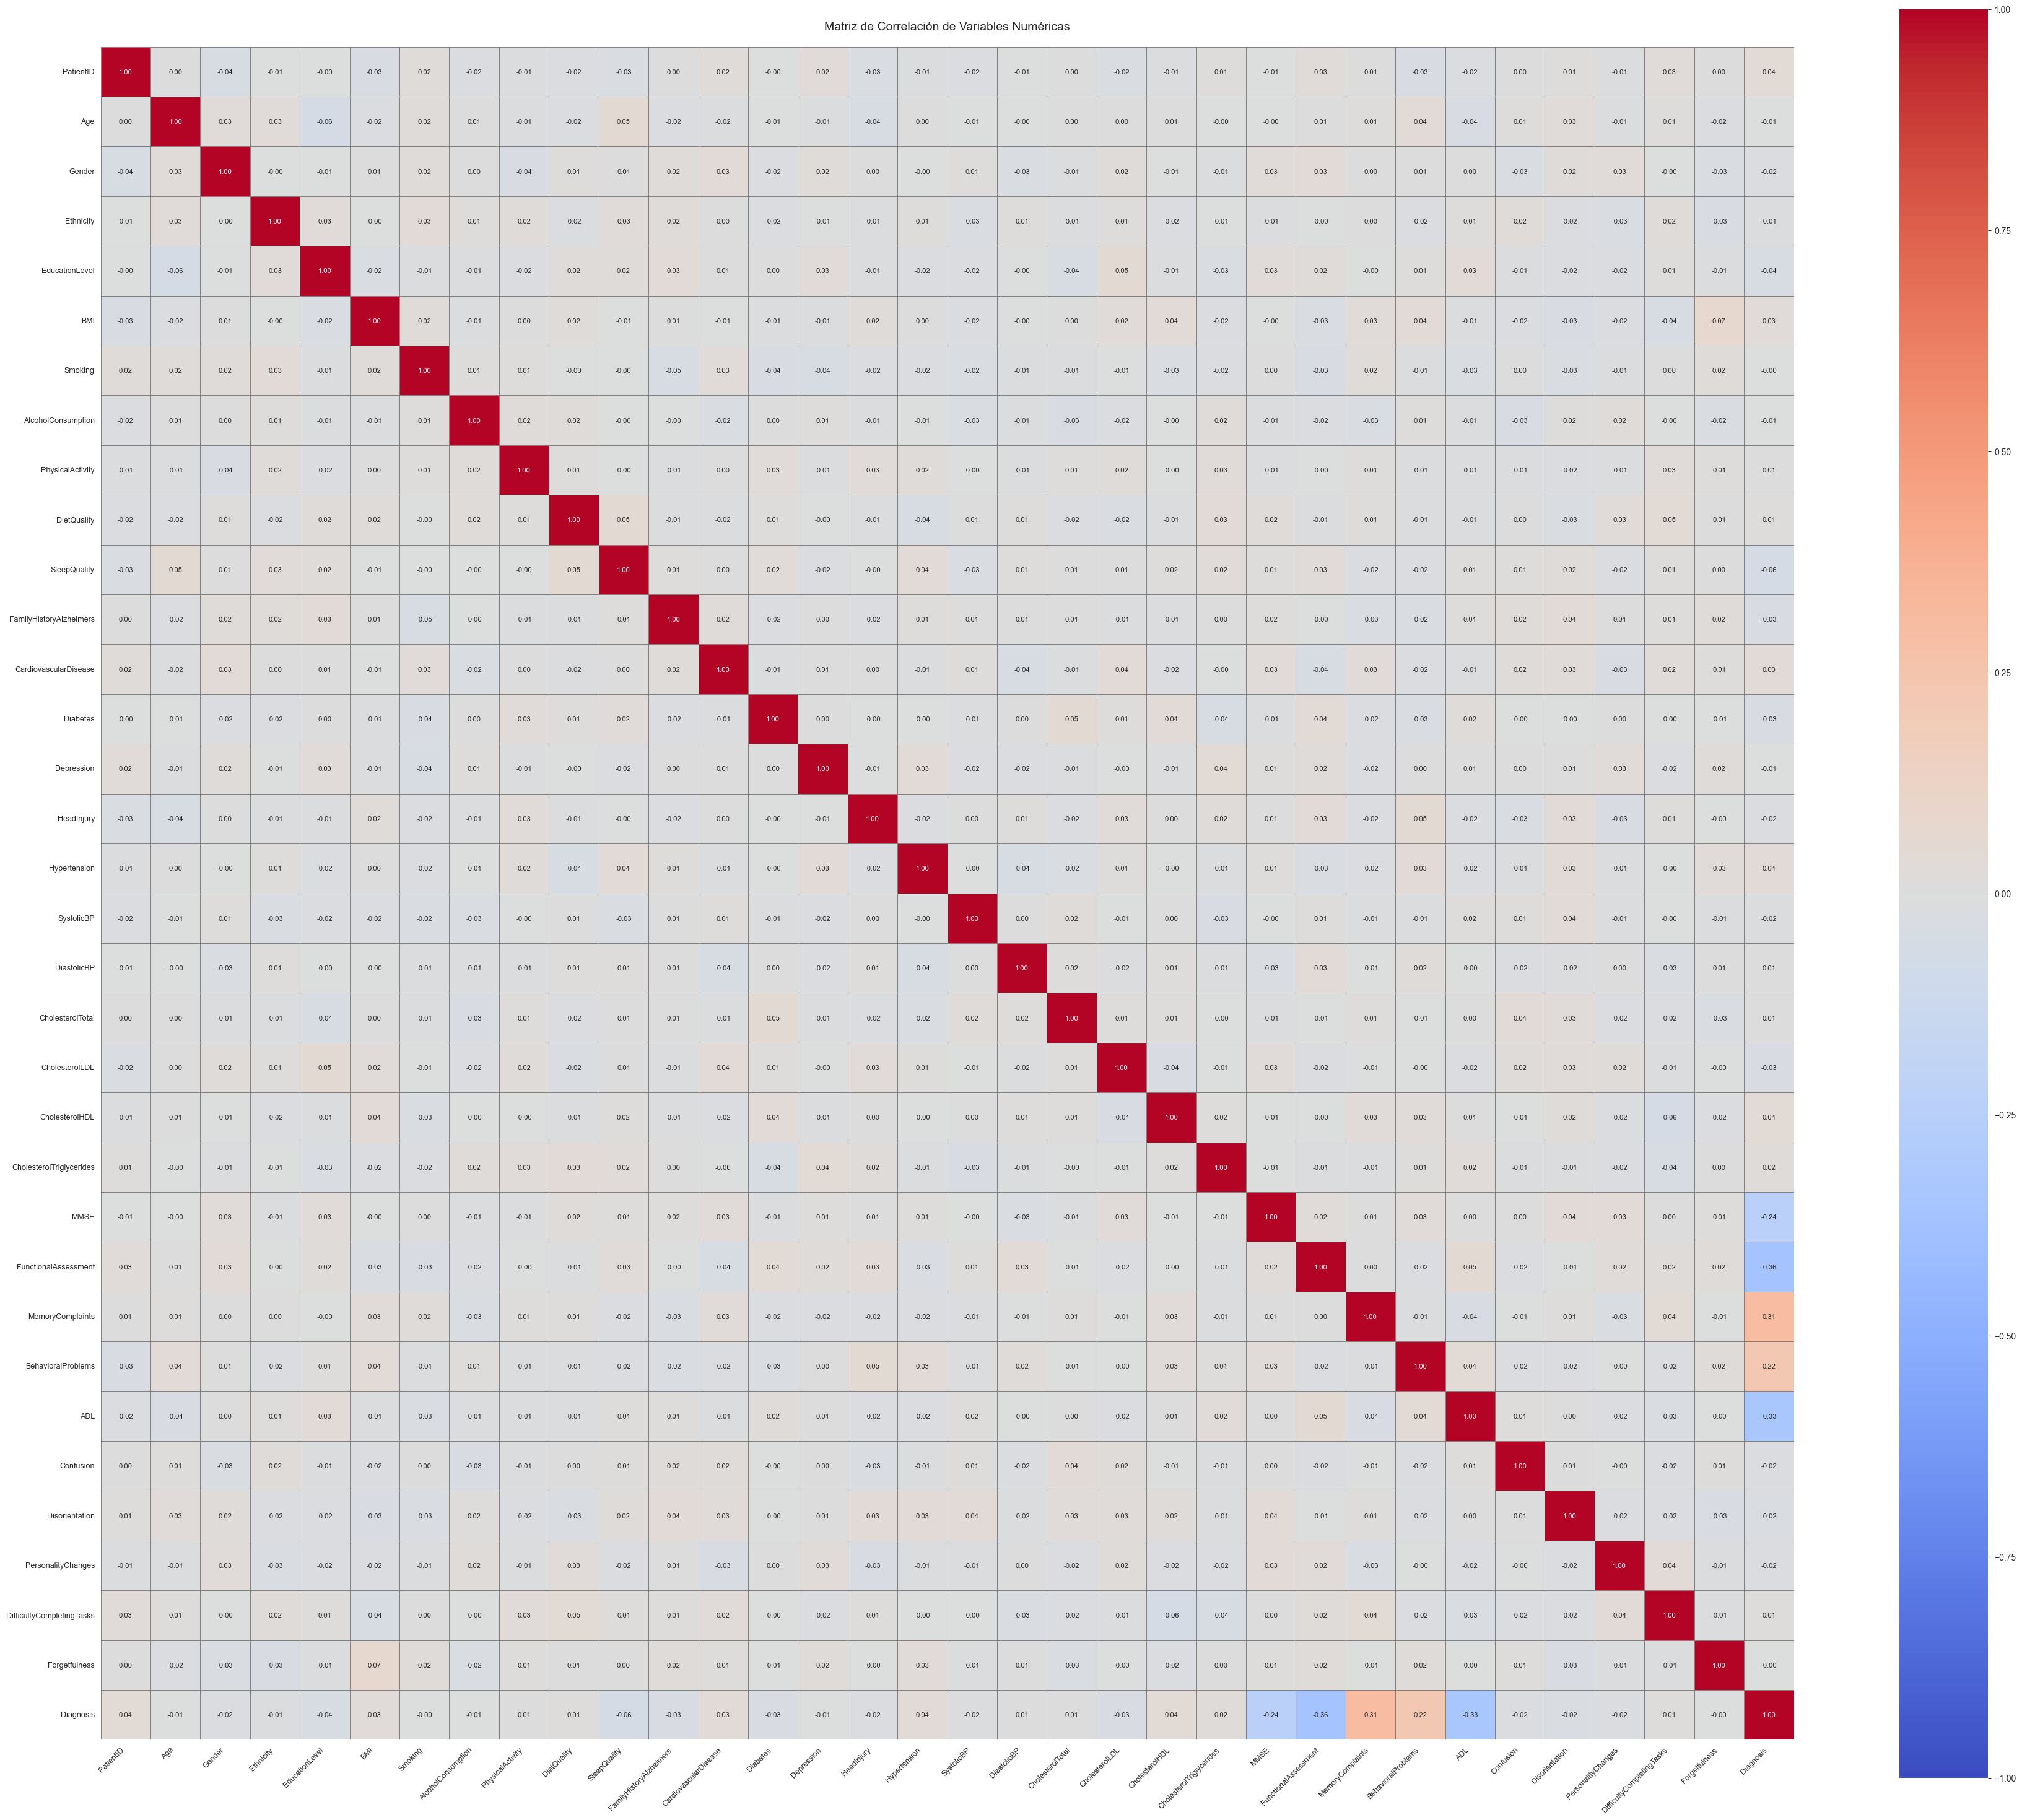


--------------------------------------------------------------------------------
CORRELACIONES FUERTES (|r| > 0.7):
--------------------------------------------------------------------------------

No hay correlaciones fuertes entre variables.


In [18]:
if len(numeric_cols) > 1:
    print("\n" + "="*80)
    print("MATRIZ DE CORRELACIÓN")
    print("="*80 + "\n")
    
    correlation_matrix = df[numeric_cols].corr()
    print(correlation_matrix.round(3))
    
    # Heatmap de correlación - Mejorado para legibilidad
    fig_size = max(14, len(numeric_cols) + 2)
    fig, ax = plt.subplots(figsize=(fig_size, fig_size))
    
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm', 
                center=0, 
                square=True, 
                ax=ax, 
                cbar_kws={"shrink": 0.8},
                vmin=-1, 
                vmax=1,
                annot_kws={"size": 8},
                linewidths=0.5,
                linecolor='gray')
    
    ax.set_title('Matriz de Correlación de Variables Numéricas', fontsize=14, pad=20)
    
    # Rotar etiquetas para mejor legibilidad
    plt.xticks(rotation=45, ha='right', fontsize=9)
    plt.yticks(rotation=0, fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Encontrar correlaciones fuertes (>0.7 o <-0.7)
    print("\n" + "-"*80)
    print("CORRELACIONES FUERTES (|r| > 0.7):")
    print("-"*80 + "\n")
    
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                strong_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Correlación': correlation_matrix.iloc[i, j].round(3)
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlación', key=abs, ascending=False)
        print(strong_corr_df.to_string(index=False))
    else:
        print("No hay correlaciones fuertes entre variables.")
else:
    print("\nNo hay suficientes variables numéricas para calcular correlación.")

## 9. Resumen Ejecutivo

Conclusiones y recomendaciones generales sobre el dataset.

In [17]:
print("\n" + "="*80)
print("RESUMEN EJECUTIVO DEL EDA")
print("="*80 + "\n")

print(f"📊 Dataset: {data_path}")
print(f"📈 Dimensiones: {df.shape[0]:,} filas × {df.shape[1]} columnas")
print(f"\n🔍 Composición del Dataset:")
print(f"   • Variables numéricas: {len(numeric_cols)}")
print(f"   • Variables categóricas: {len(categorical_cols)}")

# Calidad de datos
pct_missing = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100)
print(f"\n⚙️  Calidad de Datos:")
print(f"   • % Valores faltantes totales: {pct_missing:.2f}%")
print(f"   • Rows completas: {len(df.dropna()):,} ({(len(df.dropna())/len(df)*100):.1f}%)")

# Recomendaciones
print(f"\n💡 Recomendaciones:")

if pct_missing > 5:
    print(f"   ⚠️  Alta proporción de valores faltantes ({pct_missing:.2f}%). Considerar:")
    print(f"       - Imputación de valores")
    print(f"       - Eliminación de columnas/filas con muchos faltantes")
else:
    print(f"   ✓ Proporción aceptable de valores faltantes ({pct_missing:.2f}%)")

if len(outlier_summary) > 0:
    print(f"   ⚠️  Se detectaron outliers. Considerar:")
    print(f"       - Análisis causa-efecto de los outliers")
    print(f"       - Posible transformación o remoción")
else:
    print(f"   ✓ No hay outliers significativos detectados")

if len(numeric_cols) > 1 and strong_corr:
    print(f"   💬 Se encontraron {len(strong_corr)} correlación(es) fuerte(s)")
    print(f"       - Revisar multicolinealidad para modelos predictivos")

print(f"\n✅ EDA completado exitosamente")
print("="*80)


RESUMEN EJECUTIVO DEL EDA

📊 Dataset: ../../alzheimers_disease_data.csv
📈 Dimensiones: 2,149 filas × 35 columnas

🔍 Composición del Dataset:
   • Variables numéricas: 34
   • Variables categóricas: 1

⚙️  Calidad de Datos:
   • % Valores faltantes totales: 0.00%
   • Rows completas: 2,149 (100.0%)

💡 Recomendaciones:
   ✓ Proporción aceptable de valores faltantes (0.00%)
   ⚠️  Se detectaron outliers. Considerar:
       - Análisis causa-efecto de los outliers
       - Posible transformación o remoción

✅ EDA completado exitosamente
